Most of this code can be found at <a href='https://keras.io'>keras.io</a>

# Useful Inputs

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [4]:
from keras.models import Sequential

model = Sequential()

W0110 13:45:55.477087 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [5]:
from keras.layers import Dense

model.add(Dense(units=4, activation='relu', input_dim=4))
model.add(Dense(units=3, activation='softmax'))

W0110 13:45:55.678673 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0110 13:45:55.683121 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Compile the model to a form that the computer can more easily work with

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

W0110 13:45:56.537764 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0110 13:45:56.549209 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [7]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=1)

W0110 13:45:57.246567 140736002601856 deprecation.py:323] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0110 13:45:57.426858 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
90/90 [==============================] - 0s 3ms/step - loss: 1.7537
Epoch 2/50
90/90 [==============================] - 0s 162us/step - loss: 1.6640
Epoch 3/50
90/90 [==============================] - 0s 160us/step - loss: 1.5452
Epoch 4/50
90/90 [==============================] - 0s 146us/step - loss: 1.4281
Epoch 5/50
90/90 [==============================] - 0s 127us/step - loss: 1.3093
Epoch 6/50
90/90 [==============================] - 0s 146us/step - loss: 1.2178
Epoch 7/50
90/90 [==============================] - 0s 158us/step - loss: 1.1303
Epoch 8/50
90/90 [==============================] - 0s 175us/step - loss: 1.0771
Epoch 9/50
90/90 [==============================] - 0s 184us/step - loss: 1.0271
Epoch 10/50
90/90 [==============================] - 0s 149us/step - loss: 0.9889
Epoch 11/50
90/90 [==============================] - 0s 184us/step - loss: 0.9541
Epoch 12/50
90/90 [==============================] - 0s 118us/step - loss: 0.9300
Epoch 13/50
90/90 [========

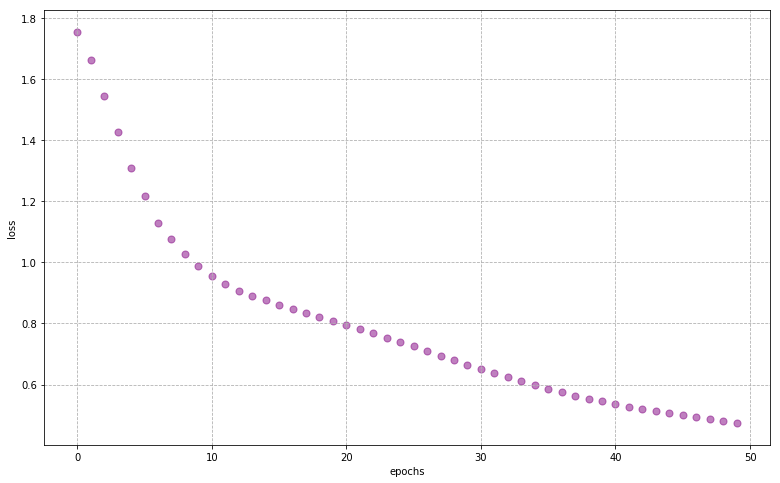

In [8]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

In [9]:
### Let's build a new model and add another layer
model_mlp = Sequential()

model_mlp.add(Dense(input_dim=4, units=4, activation='relu'))
model_mlp.add(Dense(units=4, activation='relu'))
model_mlp.add(Dense(units=3, activation='softmax'))

model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


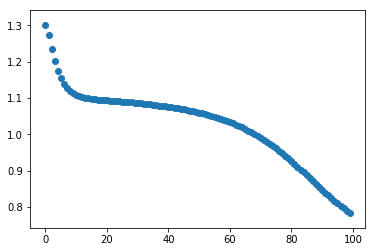

In [10]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history = model_mlp.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
plt.scatter(history.epoch, history.history["loss"])

In [29]:
optimizer_dict = {"adam_001": {"optimizer": optimizers.Adam(), "color": "blue"},
                  "adam_01": {"optimizer": optimizers.Adam(lr=0.01), "color": "orange"},
                  "sgd_nag": {"optimizer": optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True), "color": "pink"},
                  "sgd": {"optimizer": optimizers.SGD(lr=0.001), "color": "red"},
                  "adagrad": {"optimizer": optimizers.Adagrad(), "color": "yellow"},
                  "adadelta": {"optimizer": optimizers.Adadelta(), "color": "teal"}}



optimizer_dict2 = {"adam_001": {"optimizer": optimizers.Adam(), "color": "blue"},
                   "adam_01": {"optimizer": optimizers.Adam(lr=0.01), "color": "orange"},
                   "adam_1": {"optimizer": optimizers.Adam(lr=0.05), "color": "red"}}

In [30]:
for label, optimizer in optimizer_dict2.items():
    # Build Model
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer['optimizer'])
    
    # train our model and get our history
    history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
    
    # store history to our dictionary
    optimizer_dict2[label]['history'] = history
    print(f"Finished fitting {label} optimizer")

Finished fitting adam_001 optimizer
Finished fitting adam_01 optimizer
Finished fitting adam_1 optimizer


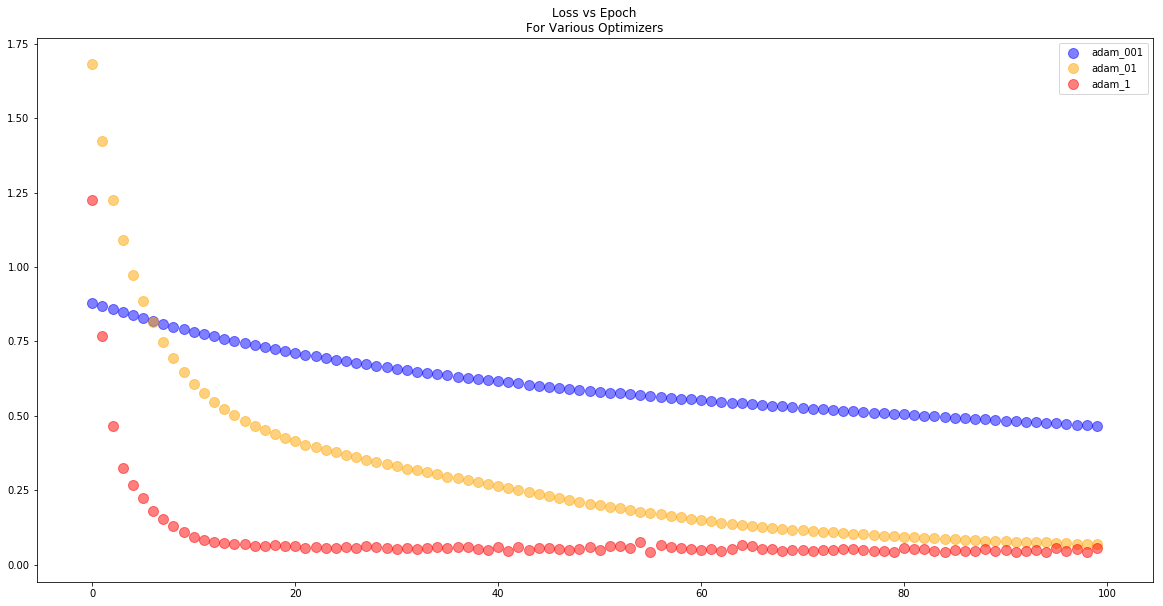

In [31]:
plt.figure(figsize=(20, 10))
for label, optdict in optimizer_dict2.items():
    history = optdict['history']
    color = optdict["color"]
    plt.scatter(history.epoch, history.history["loss"], alpha=0.5, color=color, label=label, s=100)
plt.legend()
plt.title("Loss vs Epoch\nFor Various Optimizers")
plt.show()

In [14]:
# alternatively could have specified a specific batch to train on
# model.train_on_batch(x_batch, y_batch)

# Evaluating the Trained Model

We can look at the overall loss from our test data after training the model was trained

In [15]:
# Could also just use a batch to evaluate
# loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)
loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

60/60 [==============================] - 0s 2ms/step


0.45999593337376915

We can have predictions (probability the data point is a particular class based on our trained model)

In [16]:
probs = model.predict(x_test)
probs

array([[9.91870165e-01, 4.89544764e-04, 7.64027564e-03],
       [9.87217128e-01, 9.30823502e-04, 1.18520688e-02],
       [1.43594220e-01, 4.22444522e-01, 4.33961302e-01],
       [9.88276660e-01, 1.02297112e-03, 1.07003497e-02],
       [9.94757414e-01, 3.79149336e-04, 4.86352481e-03],
       [1.59799784e-01, 2.46332377e-01, 5.93867838e-01],
       [9.79091346e-01, 2.53083766e-03, 1.83777958e-02],
       [1.26570597e-01, 2.11920783e-01, 6.61508620e-01],
       [1.37988880e-01, 2.96990871e-01, 5.65020263e-01],
       [9.68538761e-01, 3.34281777e-03, 2.81184390e-02],
       [9.97465491e-01, 2.19659836e-04, 2.31492636e-03],
       [9.91338611e-01, 4.52200155e-04, 8.20926949e-03],
       [9.88781989e-01, 1.07399863e-03, 1.01439683e-02],
       [9.96240973e-01, 3.78311641e-04, 3.38082085e-03],
       [1.49244443e-01, 5.23654044e-01, 3.27101469e-01],
       [1.38124809e-01, 2.98453867e-01, 5.63421309e-01],
       [8.85912120e-01, 2.72008423e-02, 8.68869796e-02],
       [1.40967950e-01, 5.11697

We want to say what is the predicted class, so we pick just the largest probability for each result

In [19]:
predictions = np.argmax(probs, axis=1)

predictions

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0])

Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

In [20]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.85])

### But Behold!!!! An out of the box RFC comes into the fold! 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier()

In [23]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
clf.score(x_test, y_test)

0.9333333333333333